## Geometría Computacional ##

### Punto Extra. Tarea 1 ###
### Algoritmo de Graham ###

#### Fhernanda Romo Olea ####

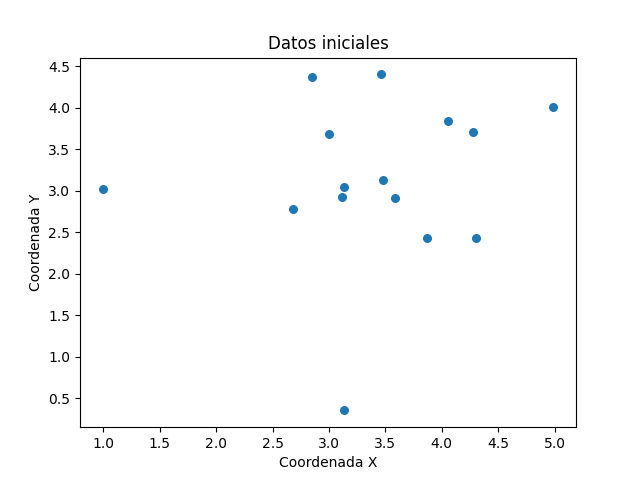

In [102]:
from matplotlib import pyplot as plt
import numpy as np

# Para generar datos distintos cambiar la semilla
np.random.seed(191200)
# Para cambiar la cantidad de datos cambiar el segundo parámetro
x, y = 3 + np.random.randn(2, 15)

fig, ax = plt.subplots()
ax.scatter(x, y, s=30)
ax.set_title("Datos iniciales")
ax.set_xlabel("Coordenada X")
ax.set_ylabel("Coordenada Y")
plt.show()

In [103]:
def busca_min():
    y_min = y[0]
    for elem in y:
        if(elem < y_min):
            y_min = elem
    return y_min

**Se busca al menor elemento en y para con respecto a él ordenar por ángulo al resto de los datos**
**También se mueven los datos tal que el mínimo quede en el orígen**

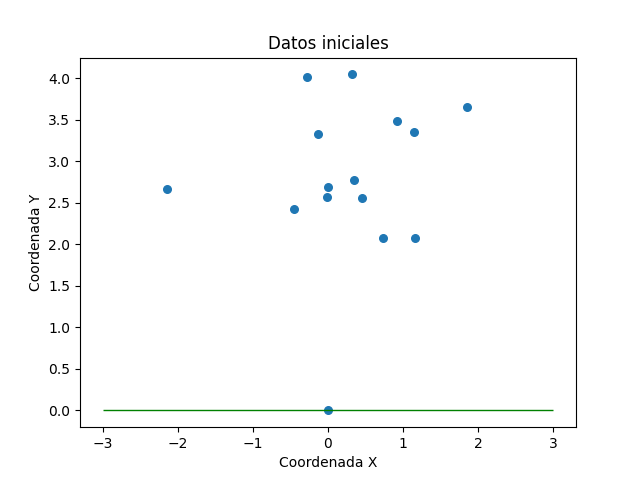

In [104]:
elemy = busca_min()
elemx = x[list(y).index(elemy)]
for pos in range(len(x)):
    x[pos] = x[pos]-elemx
    y[pos] = y[pos]-elemy
fig, ax = plt.subplots()
ax.scatter(x, y, s=30)
ax.set_title("Datos iniciales")
ax.set_xlabel("Coordenada X")
ax.set_ylabel("Coordenada Y")
ax.hlines(y=0, xmin=-3, xmax=3, linewidth=1, color='g')
plt.show()

In [105]:
#Dado un vector (x,y) se calcula su unitario
def vector_unitario(vector):
    return vector / np.linalg.norm(vector)

# Devuelve en radianes el ángulo entre v1 y v2
def angle_between(v1, v2):
    v1_u = vector_unitario(v1)
    v2_u = vector_unitario(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

#Ordena con respecto a los ángulos
def sort_angles():
    lista = []
    for pos in range(0,len(x)):
        lista.append((x[pos],y[pos],angle_between((1,0),(x[pos],y[pos]))))   
    return sorted(lista, key=lambda tup: tup[2])

# calcula producto punto de dos vectores
# if p1 is clockwise from p2 wrt origin then it returns +ve value
# if p2 is anti-clockwise from p2 wrt origin then it returns -ve value
# if p1 p2 and origin are collinear then it returs 0
def cross_product(p1,p2,p3):
    return ((p2[0] - p1[0])*(p3[1] - p1[1])) - ((p2[1] - p1[1])*(p3[0] - p1[0]))

sorted_list=sort_angles()
print(sorted_list)


[(1.1638347930950275, 2.079475126814928, 1.0605537841511556), (1.8544951113583386, 3.652099992235451, 1.1009371889444974), (0.7351934222856205, 2.0755213402078256, 1.2303660352632007), (1.1433173705434587, 3.3504098123738744, 1.2419404413799517), (0.9193995458091662, 3.4874933396727164, 1.3130333661814981), (0.4510339009397133, 2.55307113229978, 1.3959372690921115), (0.3393926763695041, 2.780063688135387, 1.4493165483476669), (0.32533270834393324, 4.047131138850208, 1.4905828015162876), (-0.003548287137905781, 2.6867291895823926, 1.5721169977016345), (-0.018691795684030676, 2.5716413252609933, 1.5780646290841183), (-0.13683581106068665, 3.32455797593688, 1.6119322072988402), (-0.28428582927699964, 4.017417403786893, 1.6414418947725706), (-0.4550608474282378, 2.4236745392255252, 1.7563921331857135), (-2.143789788624085, 2.670475187224421, 2.247226841458596), (0.0, 0.0, nan)]


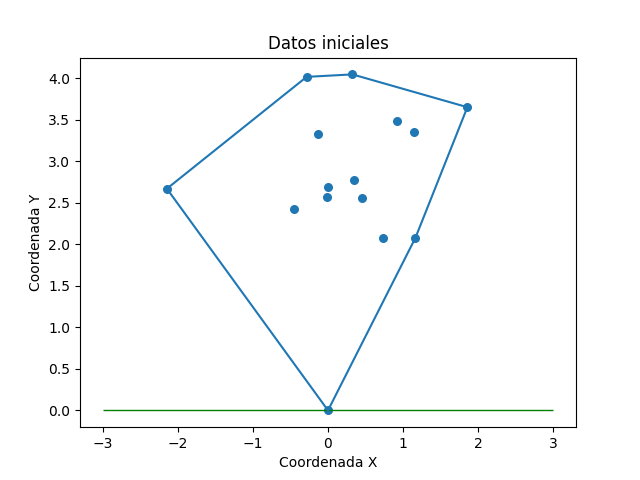

In [106]:

stackx = [0]
stacky = [0]

for elem in sorted_list:
    
    if(len(stackx)<3):
        stackx.append(elem[0])
        stacky.append(elem[1])
        continue
        
    stackx.append(elem[0])
    stacky.append(elem[1])
    
    while(cross_product((stackx[-3],stacky[-3]),(stackx[-2],stacky[-2]),(stackx[-1],stacky[-1]))<0 and len(stackx)>2):
        stackx.pop(-2)
        stacky.pop(-2)

            
fig, ax = plt.subplots()
ax.scatter(x, y, s=30)
ax.set_title("Datos iniciales")
ax.set_xlabel("Coordenada X")
ax.set_ylabel("Coordenada Y")
ax.hlines(y=0, xmin=-3, xmax=3, linewidth=1, color='g')
plt.plot(stackx,stacky)
plt.show()
